Project Description:
Mental Health First Aid teaches participants how to notice and support an individual who may be experiencing a mental health or substance use concern or crisis and connect them with the appropriate employee resources.

Employers can offer robust benefits packages to support employees who go through mental health issues. That includes Employee Assistance Programs, Wellness programs that focus on mental and physical health, Health and Disability Insurance, or flexible working schedules or time off policies. Organizations that incorporate mental health awareness help to create a healthy and productive work environment that reduces the stigma associated with mental illness, increases the organizations' mental health literacy, and teaches the skills to safely and responsibly respond to a co-worker's mental health concern.

The main purpose of the Mental Health Prediction system is to predict whether a person needs to seek Mental health treatment or not based on inputs provided by them.

We will be using classification algorithms such as Logistic Regression, KNN, Decision tree, Random Forest, AdaBoost, GradientBoost, and XGBoost. We will train and test the data with these algorithms. From this, the best model is selected and saved in pkl format. We will also be deploying our model locally using Flask.

In [157]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# LOAD THE DATA SET

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [159]:
data=pd.read_csv('C:\\Users\\DEVULAPALLI LAVANYA\\Downloads\\archive\\survey.csv')
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [160]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [161]:
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


In [162]:
data.shape

(1259, 27)

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# DATA PREPROCESSING

# Removing Unnecessary Columns

<AxesSubplot:>

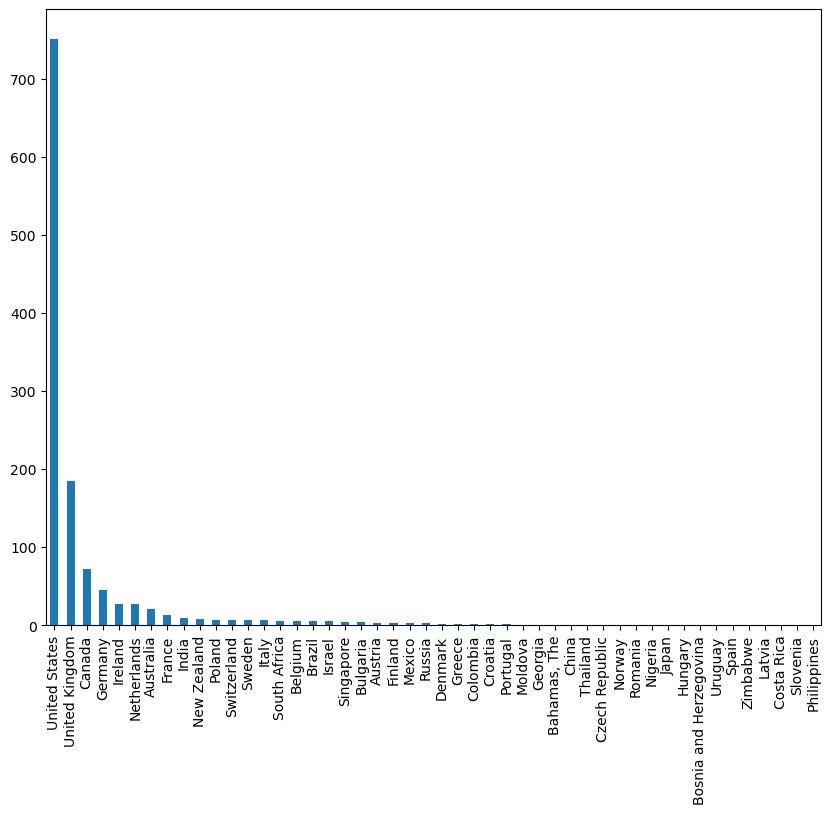

In [164]:
data['Country'].value_counts().plot(kind='bar',figsize=(10,8))

In [165]:
data.drop(['comments'], axis= 1, inplace=True)
data.drop(['state'], axis= 1, inplace=True)
data.drop(['Timestamp'], axis= 1, inplace=True)
data.drop(['Country'], axis= 1, inplace=True)

# Handling null values and dealing with wrongly Entered data

In [166]:
data.isnull().sum()

Age                            0
Gender                         0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [167]:
data['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [168]:
data['self_employed'].fillna('No',inplace=True)

In [169]:
data['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [170]:
data['work_interfere'].fillna('N/A',inplace=True)

<AxesSubplot:>

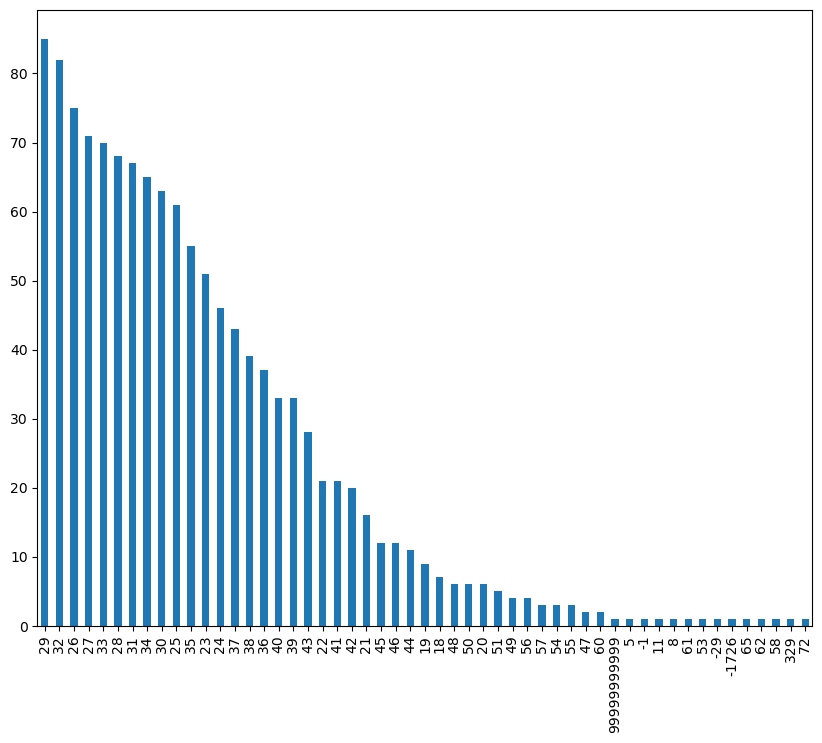

In [171]:
data['Age'].value_counts().plot(kind='bar',figsize=(10,8))

In [172]:
data.drop(data[(data['Age']>60) | (data['Age']<18)].index,inplace=True)

<AxesSubplot:>

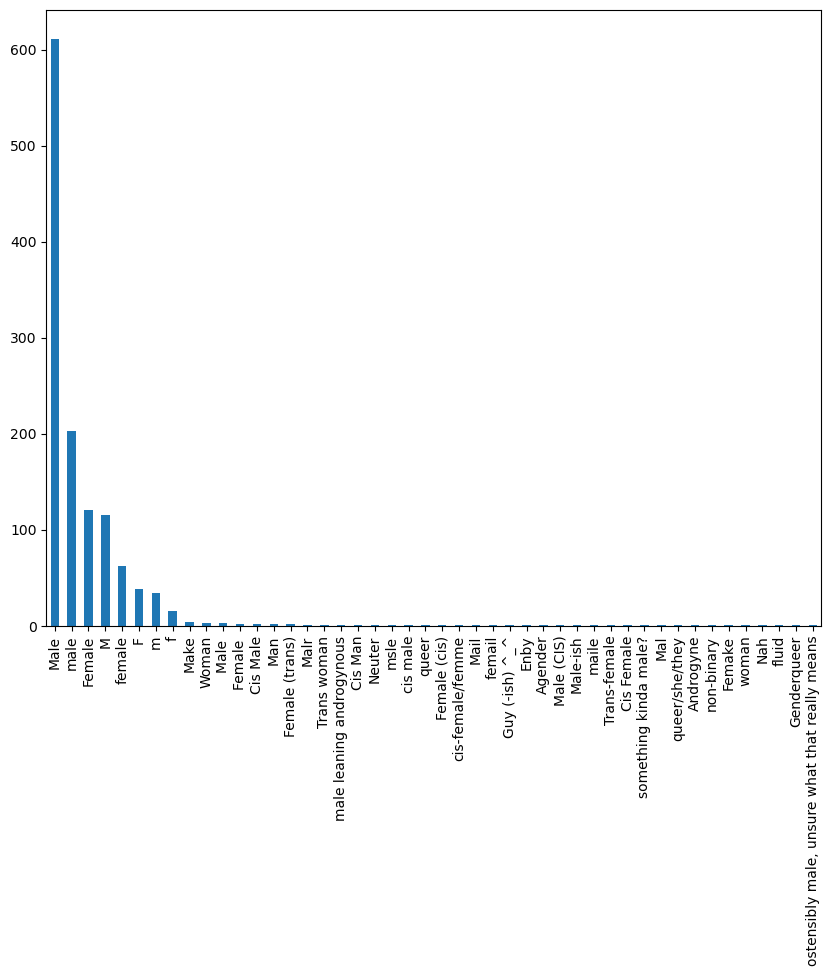

In [173]:
data['Gender'].value_counts().plot(kind='bar',figsize=(10,8))

In [174]:
data['Gender'].replace(['Male','male','M','m','Male','Cis Male','Man','cis male','Mail','Male-ish','Male (CIS)','Cis Man','msle','Malr','Mal','maile','Make',],'Male',inplace=True)
data['Gender'].replace(['Female','female','F','f','Woman','Female','femail','Cis Female','cis-female/femme','Femake','Female (cis)','woman',],'Female',inplace=True)
data["Gender"].replace(['Female (trans)','queer/she/they','non-binary','fluid','queer','Androgyne','Trans-female','male leaning androgynous','Agender','A little about you','Nah','All','ostensibly male,unsure what that really means','Genderqueer','Enby','p','Neuter','something kinda male?','Guy (-ish) ^_^','Trans Woman',],'Non-Binary',inplace=True)

# Data Analysis And Visualization

# Univariate Analysis

In [177]:
#sb.distplot(data["Age"])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

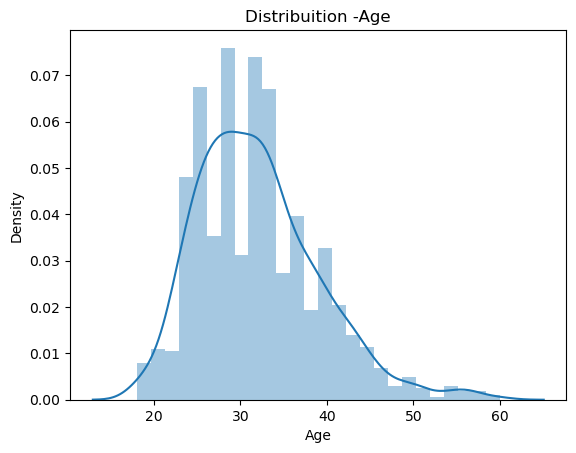

In [178]:

sb.distplot(data["Age"])
plt.title("Distribuition -Age")
plt.xlabel("Age")

# Bivariate analysis

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Employment Type')

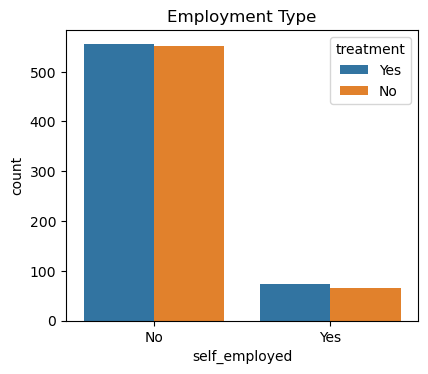

In [179]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,1)
sb.countplot(data['self_employed'],hue=data['treatment'])
plt.title('Employment Type')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Family History')

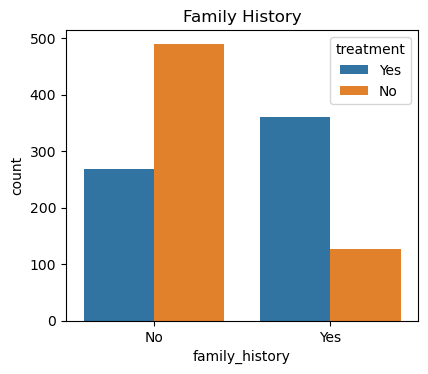

In [180]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,2)
sb.countplot(data['family_history'],hue=data['treatment'])
plt.title('Family History')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Work Interference')

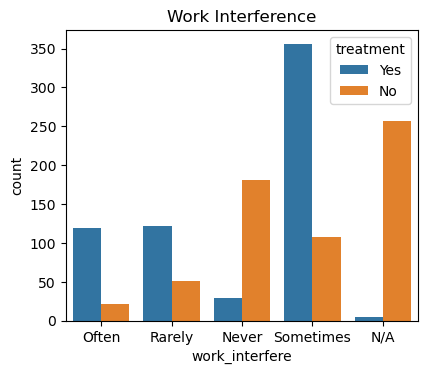

In [181]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,3)
sb.countplot(data['work_interfere'],hue=data['treatment'])
plt.title('Work Interference')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Work Type')

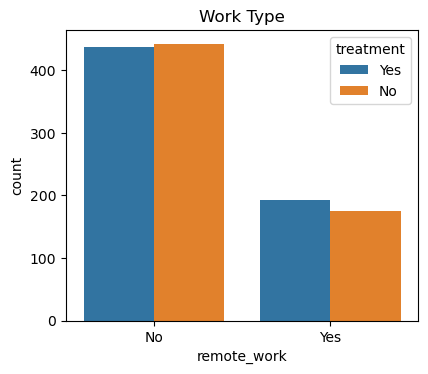

In [182]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,4)
sb.countplot(data['remote_work'],hue=data['treatment'])
plt.title('Work Type')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Company')

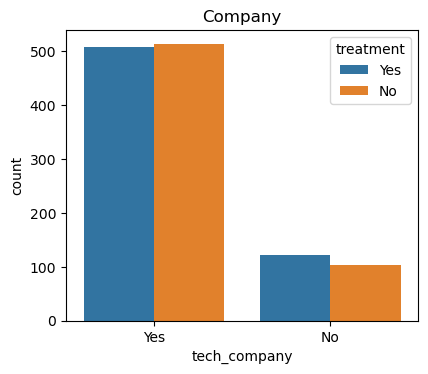

In [183]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,5)
sb.countplot(data['tech_company'],hue=data['treatment'])
plt.title('Company')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Benefits')

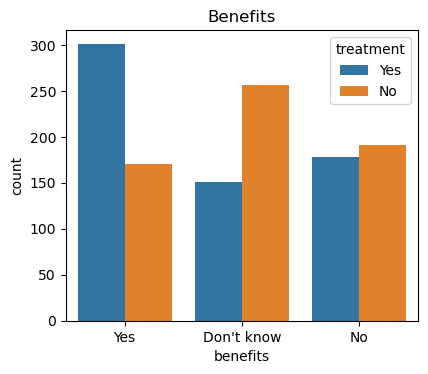

In [184]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,6)
sb.countplot(data['benefits'],hue=data['treatment'])
plt.title('Benefits')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Care Options')

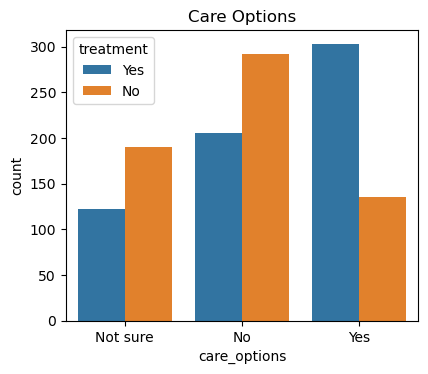

In [185]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,7)
sb.countplot(data['care_options'],hue=data['treatment'])
plt.title('Care Options')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Equal importance to Mental and Physical health')

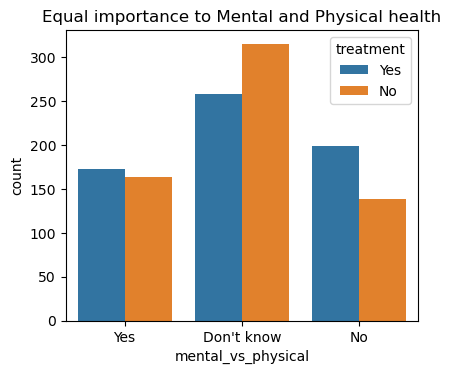

In [186]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,8)
sb.countplot(data['mental_vs_physical'],hue=data['treatment'])
plt.title('Equal importance to Mental and Physical health')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Wellness Program')

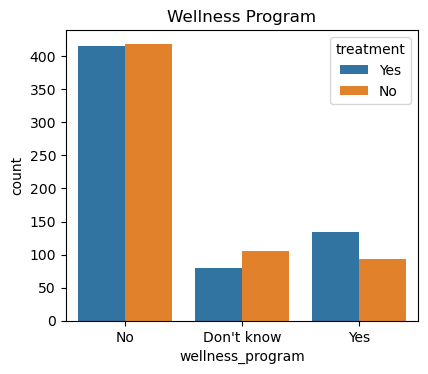

In [187]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,9)
sb.countplot(data['wellness_program'],hue=data['treatment'])
plt.title('Wellness Program')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Anonymity')

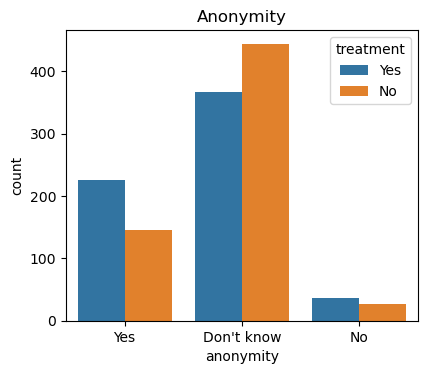

In [188]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,10)
sb.countplot(data['anonymity'],hue=data['treatment'])
plt.title('Anonymity')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Leave')

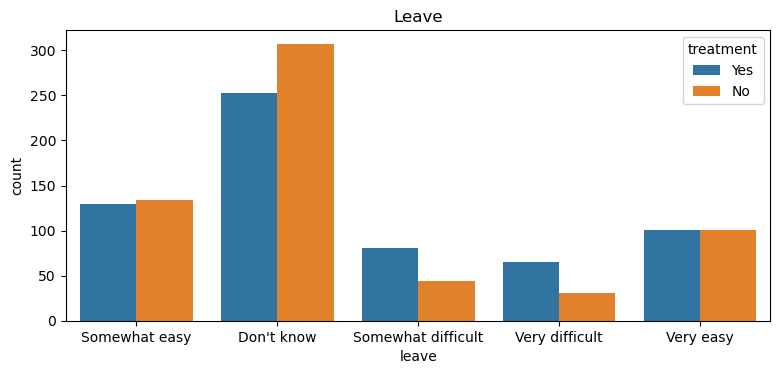

In [189]:
plt.figure(figsize=(20,40))
plt.subplot(9,2,11)
sb.countplot(data['leave'],hue=data['treatment'])
plt.title('Leave')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mental Health Consequence')

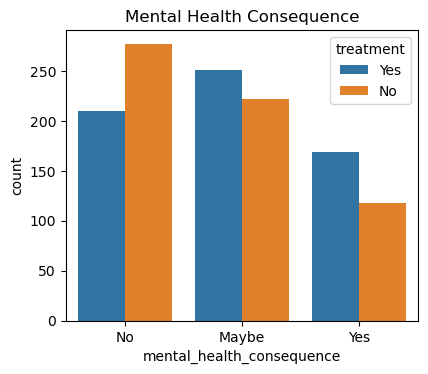

In [190]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,12)
sb.countplot(data['mental_health_consequence'],hue=data['treatment'])
plt.title('Mental Health Consequence')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Physical Health Consequence')

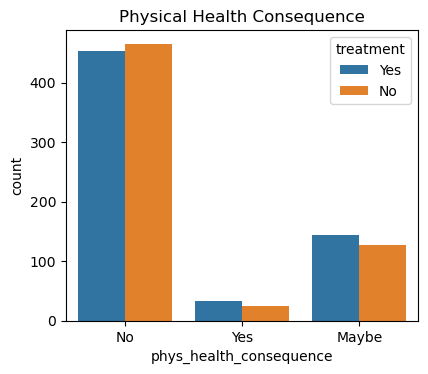

In [191]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,13)
sb.countplot(data['phys_health_consequence'],hue=data['treatment'])
plt.title('Physical Health Consequence')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discussion With Coworkers')

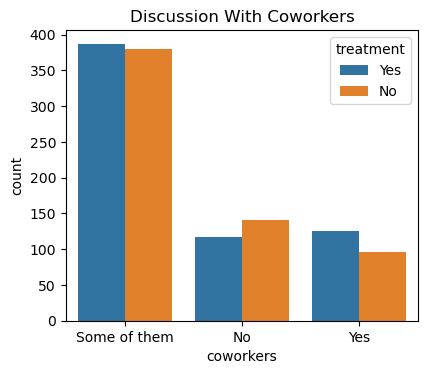

In [192]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,14)
sb.countplot(data['coworkers'],hue=data['treatment'])
plt.title('Discussion With Coworkers')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discussion With supervisor')

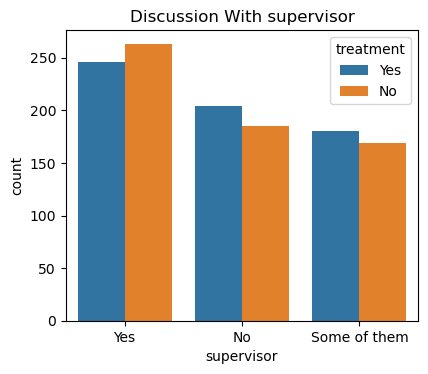

In [193]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,11)
sb.countplot(data['supervisor'],hue=data['treatment'])
plt.title('Discussion With supervisor')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discussion with Interviewer(Mental)')

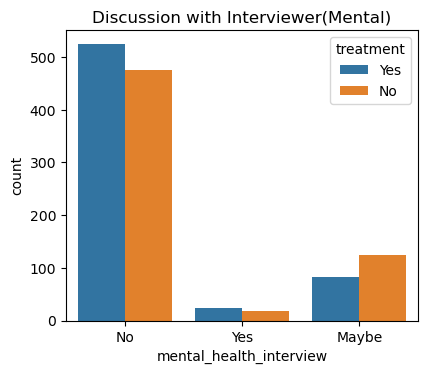

In [194]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,16)
sb.countplot(data['mental_health_interview'],hue=data['treatment'])
plt.title('Discussion with Interviewer(Mental)')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Discussion with Interviewer(Physical)')

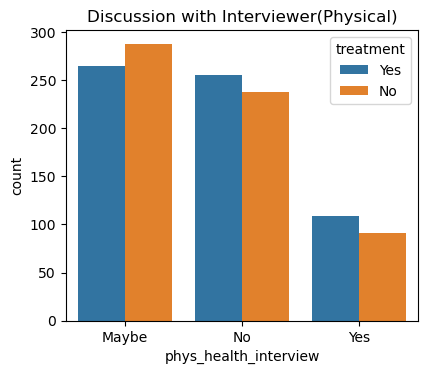

In [195]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,17)
sb.countplot(data['phys_health_interview'],hue=data['treatment'])
plt.title('Discussion with Interviewer(Physical)')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'consequence after Disclosure')

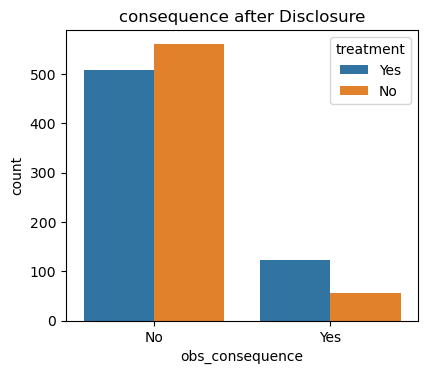

In [196]:
plt.figure(figsize=(10,40))
plt.subplot(9,2,18)
sb.countplot(data['obs_consequence'],hue=data['treatment'])
plt.title('consequence after Disclosure')

# Descriptive Analysis

In [197]:
data.describe(include='all')

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1247.000000,1247,1247,1247,1247,1247,1247,1247,1247,1247,...,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
unique,NaN,7,2,2,2,5,6,2,2,3,...,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,980,1107,759,630,463,288,879,1023,471,...,811,560,487,918,767,509,1000,553,573,1068
mean,31.971131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.052598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Model Building

# Handling Categorical Values

In [198]:
x=data.drop('treatment',axis=1)
y=data['treatment']

In [199]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [200]:
x=data.drop('treatment',axis=1)
y=data['treatment']

In [201]:
ct=ColumnTransformer([('oe',OrdinalEncoder(),['Gender','self_employed','family_history','work_interfere','no_employees','remote_work','tech_company','benefits','care_options','wellness_program','seek_help','anonymity','leave','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence'])],remainder='passthrough')

In [202]:
x=ct.fit_transform(x)

In [203]:
le=LabelEncoder()
y=le.fit_transform(y)

In [204]:
import joblib
joblib.dump(ct,'feature_values')

['feature_values']

# Splitting data Into Train And Test

In [205]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=49)

In [206]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((872, 22), (375, 22), (872,), (375,))

# Comparing Accuracy Of various Models

In [207]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [208]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from xgboost.sklearn import XGBClassifier

from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report, auc



In [209]:
model_dict = {}



model_dict['Logistic regression']= LogisticRegression (solver='liblinear', random_state=49)

model_dict['KNN Classifier'] = KNeighborsClassifier()

model_dict['Decision Tree Classifier'] = DecisionTreeClassifier(random_state=49) 
model_dict['Random Forest Classifier'] = RandomForestClassifier(random_state=49)

model_dict['AdaBoost Classifier'] = AdaBoostClassifier(random_state=49)

model_dict['Gradient Boosting Classifier'] = GradientBoostingClassifier(random_state=49)

model_dict['XGB Classifier'] =XGBClassifier(random_state=49) 


In [210]:
def model_test(x_train, x_test, y_train, y_test, model, model_name):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('=================================={}=================='.format(model_name))
    print('score is :{}'.format(accuracy))
    print()
    




In [211]:
for model_name,model in model_dict.items():
    model_test(x_train,x_test,y_train,y_test,model,model_name)

==================================Logistic regression==================
score is :0.8506666666666667

==================================KNN Classifier==================
score is :0.7973333333333333

==================================Decision Tree Classifier==================
score is :0.7946666666666666

==================================Random Forest Classifier==================
score is :0.848

==================================AdaBoost Classifier==================
score is :0.864

==================================Gradient Boosting Classifier==================
score is :0.832

==================================XGB Classifier==================
score is :0.8293333333333334



In [212]:
abc = AdaBoostClassifier(random_state=99)

abc.fit(x_train,y_train)

pred_abc = abc.predict(x_test)

print('Accuracy of AdaBoost=' ,accuracy_score (y_test, pred_abc))

Accuracy of AdaBoost= 0.864


# Hyperparameter tuning Of Selected Model

In [213]:
from sklearn.model_selection import RandomizedSearchCV

params_abc = {'n_estimators': [int (x) for x in np.linspace(start = 1, stop = 50, num= 15)],

'learning_rate': [(0.97 + x/100) for x in range(0, 8)],}



abc_random = RandomizedSearchCV(random_state=49, estimator=abc, param_distributions = params_abc,n_iter =50, cv=5,n_jobs=-1)

In [214]:
params_abc

{'n_estimators': [1, 4, 8, 11, 15, 18, 22, 25, 29, 32, 36, 39, 43, 46, 50],
 'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04]}

In [215]:
abc_random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                          1.01, 1.02, 1.03,
                                                          1.04],
                                        'n_estimators': [1, 4, 8, 11, 15, 18,
                                                         22, 25, 29, 32, 36, 39,
                                                         43, 46, 50]},
                   random_state=49)

In [216]:
abc_random.best_params_

{'n_estimators': 11, 'learning_rate': 1.02}

In [217]:
abc_tuned = AdaBoostClassifier (random_state=49,n_estimators=11, learning_rate=1.02) 
abc_tuned.fit(x_train, y_train)

pred_abc_tuned = abc_tuned.predict(x_test)

print('Accuracy of AdaBoost (tuned)=', accuracy_score (y_test, pred_abc_tuned))

Accuracy of AdaBoost (tuned)= 0.8693333333333333


# Evaluating of performance of models

Text(50.722222222222214, 0.5, 'Actual')

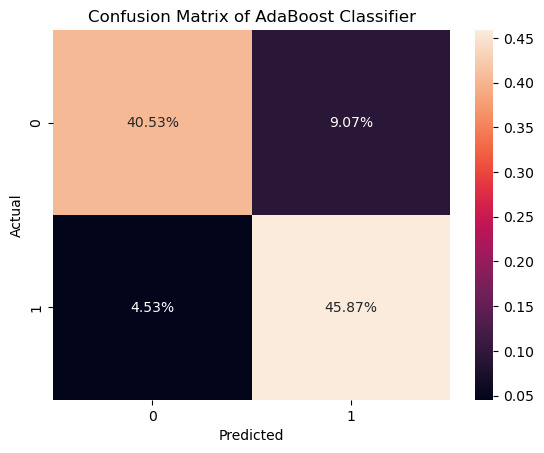

In [218]:
cf_matrix = confusion_matrix (y_test, pred_abc)

sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

plt.title('Confusion Matrix of AdaBoost Classifier')

plt.xlabel('Predicted')

plt.ylabel('Actual')

Text(50.722222222222214, 0.5, 'Actual')

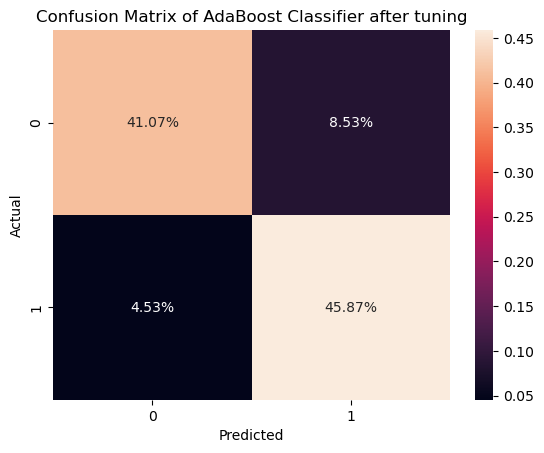

In [219]:
cf_matrix = confusion_matrix (y_test, pred_abc_tuned)

sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')

plt.title('Confusion Matrix of AdaBoost Classifier after tuning')

plt.xlabel('Predicted')

plt.ylabel('Actual')

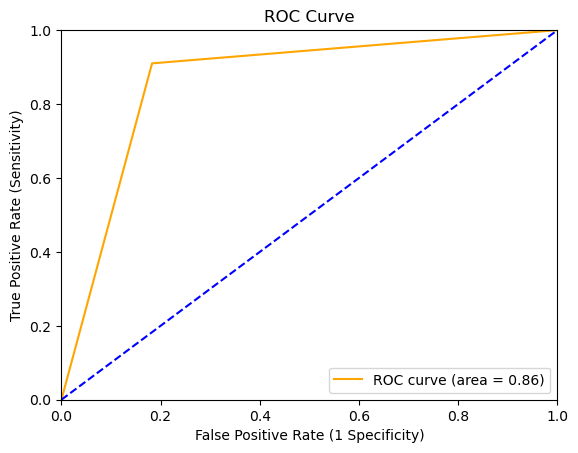

In [220]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_abc, tpr_abc, thresholds_abc = roc_curve(y_test, pred_abc)
roc_auc_abc = auc(fpr_abc, tpr_abc)

plt.plot(fpr_abc, tpr_abc, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()


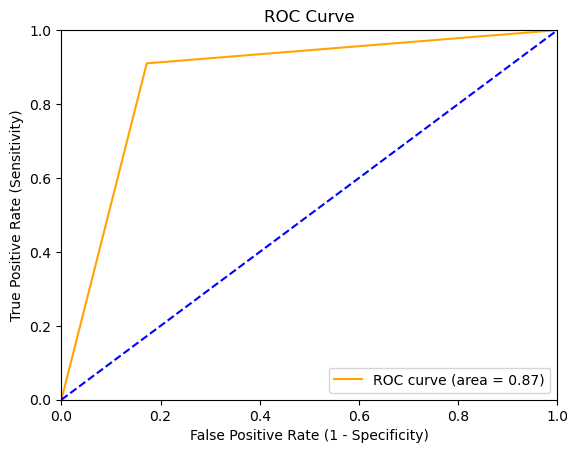

(array([0.        , 0.17204301, 1.        ]),
 array([0.        , 0.91005291, 1.        ]),
 array([2, 1, 0]))

In [221]:
fpr_abc_tuned, tpr_abc_tuned, thresholds_abc_tuned = roc_curve (y_test, pred_abc_tuned)

roc_auc_abc_tuned = auc(fpr_abc_tuned, tpr_abc_tuned)

plt.plot(fpr_abc_tuned, tpr_abc_tuned, color='orange', label='ROC curve (area = %0.2f)' % roc_auc_abc_tuned)

plt.plot([0, 1], [0, 1], color='blue', linestyle='--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.0])

plt.title('ROC Curve')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.legend (loc= "lower right")

plt.show()

roc_curve (y_test, pred_abc_tuned)

In [222]:
print(classification_report(y_test,pred_abc))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       186
           1       0.83      0.91      0.87       189

    accuracy                           0.86       375
   macro avg       0.87      0.86      0.86       375
weighted avg       0.87      0.86      0.86       375



In [223]:
print(classification_report(y_test,pred_abc_tuned))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       186
           1       0.84      0.91      0.88       189

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375



# Saving the model

In [224]:
import pickle
pickle.dump(abc_tuned,open('model.pkl','wb'))